In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline



In [2]:
!pip install missingno

In [3]:
data = pd.read_excel ('socioeconomic.xlsx', sheet_name='SocioeconomicData')
data

,SocioEconomicId,Gender,EducationLevel,EmpStatus,AvrgIncome,Disabled,DisabilityType,AnyDisabledMembers,MembersOverSeventy,MembersOverSixtyFive,...,HaveCupboard,HaveTable,HaveClock,HaveDvdPlayer,FloorMaterial,RoofMaterial,StatusCode,CountyName,SubCountyName,communityHealthUnitName
0,12,Male,Primary,Self Employed,0,No,NaN,No,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laikipia,Laikipia North,Lakipia 1
1,13,Female,Secondary,Self Employed,5000,No,NaN,No,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laikipia,Laikipia North,Lakipia 1
2,14,Male,Secondary,Self Employed,10000,No,NaN,No,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laikipia,Laikipia North,Lakipia 1
3,15,Female,Secondary,Employed,0,No,NaN,No,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laikipia,Laikipia North,Lakipia 1
4,16,Female,Primary,Self Employed,2500,No,NaN,No,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laikipia,Laikipia North,Lakipia 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31374,32880,Male,Secondary,Unemployed/None,0,No,NaN,No,0,0,...,Yes,Yes,No,No,Earth/Sand,Iron Sheet,0.0,Laikipia,Laikipia West,Karaba
31375,32883,Male,Secondary,Unemployed/None,0,No,NaN,No,0,0,...,Yes,Yes,No,No,Earth/Sand,Iron Sheet,0.0,Laikipia,Laikipia West,Karaba
31376,32884,Female,Primary,Unemployed/None,0,No,NaN,No,0,0,...,Yes,Yes,No,No,Earth/Sand,Iron Sheet,0.0,Laikipia,Laikipia West,Karaba
31377,32885,Male,Secondary,Unemployed/None,0,No,NaN,No,0,0,...,No,Yes,No,No,Earth/Sand,Iron Sheet,0.0,Laikipia,Laikipia North,Ngenia Cu


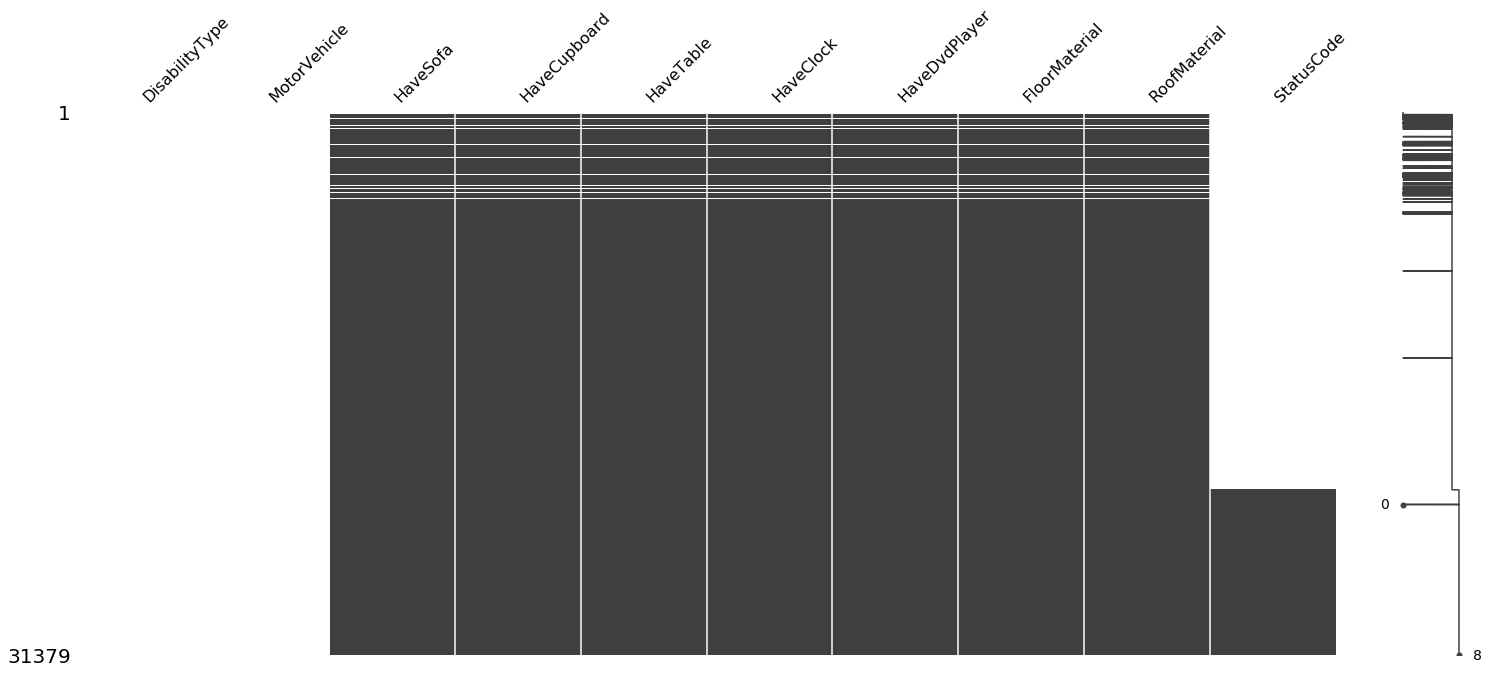

In [4]:
#checking for empty columns
data_df=data.columns[data.isnull().any()].tolist()
msno.matrix(data[data_df])

In [5]:
data.isnull().sum()

SocioEconomicId                0
Gender                         0
EducationLevel                 0
EmpStatus                      0
AvrgIncome                     0
Disabled                       0
DisabilityType             31379
AnyDisabledMembers             0
MembersOverSeventy             0
MembersOverSixtyFive           0
MembersPregnant                0
ChildrenBelowOne               0
Orphans                        0
LightingSource                 0
CookingFuelSource              0
FoodExpenditure                0
EducationExpenditure           0
MedicationExpenditure          0
AirtimeExpenditure             0
UtilityExpenditure             0
HousingType                    0
FunctionalLatrine              0
OutdoorType                    0
SafeWater                      0
WaterSource                    0
TreatedWater                   0
Handwashing                    0
RefuseDisposal                 0
MotorVehicle               31379
Bicycle                        0
Fridge    

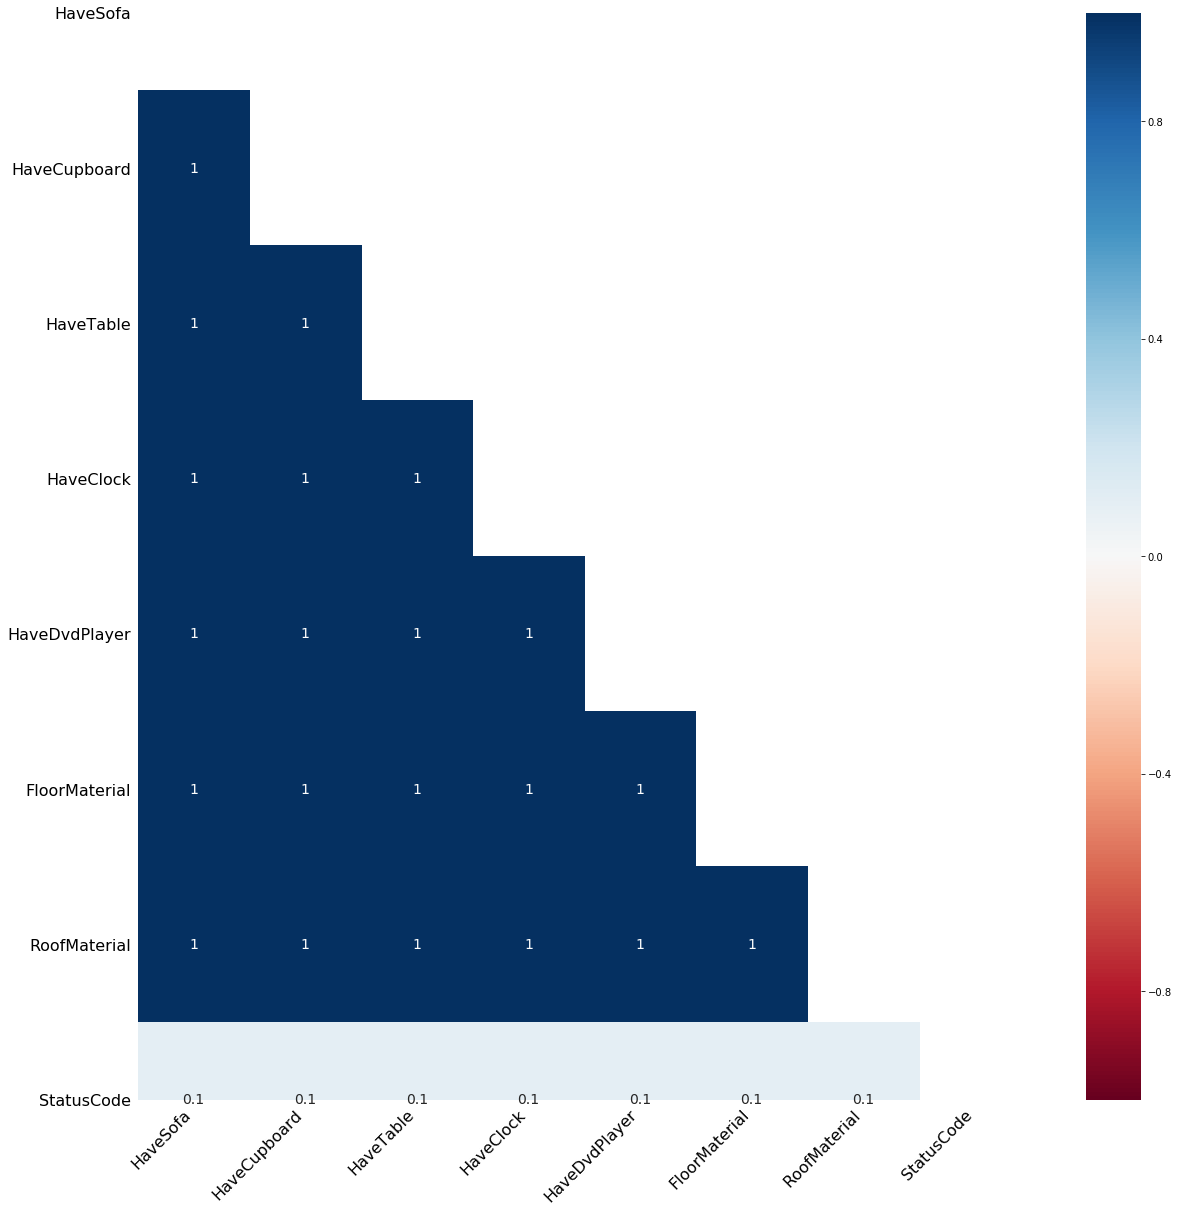

In [6]:
#plot empty columns on a heatmap
msno.heatmap(data[data_df], figsize=(20,20))

In [7]:
data_df

['DisabilityType',
 'MotorVehicle',
 'HaveSofa',
 'HaveCupboard',
 'HaveTable',
 'HaveClock',
 'HaveDvdPlayer',
 'FloorMaterial',
 'RoofMaterial',
 'StatusCode']

In [8]:
data.shape

(31379, 55)

In [9]:
#drop columns that are 90% empty
#threshold=len(data)* 0.1
#data.dropna(thresh=threshold ,axis=1 ,inplace=True)

In [10]:
#drop columns with any missing values
data=data.dropna(axis=1)
data.shape

(31379, 45)

In [11]:
#check for duplicate records
data.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
31374    False
31375    False
31376    False
31377    False
31378    False
Length: 31379, dtype: bool

In [12]:
data.isnull().sum()

SocioEconomicId            0
Gender                     0
EducationLevel             0
EmpStatus                  0
AvrgIncome                 0
Disabled                   0
AnyDisabledMembers         0
MembersOverSeventy         0
MembersOverSixtyFive       0
MembersPregnant            0
ChildrenBelowOne           0
Orphans                    0
LightingSource             0
CookingFuelSource          0
FoodExpenditure            0
EducationExpenditure       0
MedicationExpenditure      0
AirtimeExpenditure         0
UtilityExpenditure         0
HousingType                0
FunctionalLatrine          0
OutdoorType                0
SafeWater                  0
WaterSource                0
TreatedWater               0
Handwashing                0
RefuseDisposal             0
Bicycle                    0
Fridge                     0
Beds                       0
Radio                      0
Tv                         0
HaveVehicle                0
Landsize                   0
Cows          

In [13]:
#check for unique values in each column
for col in list(data):
    print(col)
    print(np.sort(data[col].unique()))
    

SocioEconomicId
[   12    13    14 ... 32884 32885 32886]
Gender
['Female' 'Male']
EducationLevel
['College' 'None' 'Primary' 'Secondary' 'University'
 'Vocational Training/Polytechnic']
EmpStatus
['Employed' 'Formal' 'Informal' 'Self Employed' 'Unemployed'
 'Unemployed/None']
AvrgIncome
[    0  2500  5000 10000]
Disabled
['No' 'Yes']
AnyDisabledMembers
['No' 'Yes']
MembersOverSeventy
[   0    1    2    3    4    5    6    7    8    9   10   20   29   30
   45   63   65   70   71   72   73   75   77   83 1001]
MembersOverSixtyFive
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  17  20  25  48
  60  63  64  65  66  67  68  70  72 200]
MembersPregnant
[ 0  1  2  3  4  5  6  8 10 11 67]
ChildrenBelowOne
[ 0  1  2  3  4  5  6  8 10 22]
Orphans
[     0      1      2      3      4      5      6      7      8      9
     10     11     12     13     18     22     23     24     25     32
     37     40     45     50     64    128    192    200    219    300
    320    436    500    59

In [14]:
#checking values for employmentstatus
data['EmpStatus'].unique()
data['EmpStatus'] = data['EmpStatus'].str.replace('Formal','Employed')
data['EmpStatus'] = data['EmpStatus'].str.replace('Informal','Self Employed')
data['EmpStatus'] = data['EmpStatus'].str.replace('Unemployed/None','Unemployed')
data.EmpStatus.unique()

/Users/venessachege/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/venessachege/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/venessachege/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying 

array(['Self Employed', 'Employed', 'Unemployed'], dtype=object)

In [15]:
#check entries in column MembersOverSeventy
data['MembersOverSeventy'].value_counts()


0       27448
1        3357
2         478
3          27
70         12
5          10
4          10
8           6
6           5
10          4
65          3
9           3
83          2
73          2
7           2
20          1
63          1
30          1
72          1
1001        1
75          1
29          1
45          1
77          1
71          1
Name: MembersOverSeventy, dtype: int64

In [16]:
#check entries in column MembersOverSixtyFive
data['MembersOverSixtyFive'].value_counts()

0      27390
1       3408
2        471
8         23
3         22
65        16
10         8
6          6
5          6
63         4
4          4
70         3
67         2
7          2
9          1
13         1
68         1
20         1
200        1
25         1
66         1
11         1
12         1
17         1
60         1
64         1
48         1
72         1
Name: MembersOverSixtyFive, dtype: int64

In [17]:
#check entries in column MembersPregnant
data['MembersPregnant'].value_counts()

0     30239
1      1056
2        36
8        14
3        13
4        10
10        5
6         2
5         2
11        1
67        1
Name: MembersPregnant, dtype: int64

In [18]:
#check entries in column childrenBelowOne
data['ChildrenBelowOne'].value_counts()

0     28104
1      3036
2       148
8        35
3        28
5        12
4         8
10        6
22        1
6         1
Name: ChildrenBelowOne, dtype: int64

In [19]:
#data.loc[:41]=pd.to_datetime(data.loc[:41])


['SocioEconomicId',
 'Gender',
 'EducationLevel',
 'EmpStatus',
 'AvrgIncome',
 'Disabled',
 'AnyDisabledMembers',
 'MembersOverSeventy',
 'MembersOverSixtyFive',
 'MembersPregnant',
 'ChildrenBelowOne',
 'Orphans',
 'LightingSource',
 'CookingFuelSource',
 'FoodExpenditure',
 'EducationExpenditure',
 'MedicationExpenditure',
 'AirtimeExpenditure',
 'UtilityExpenditure',
 'HousingType',
 'FunctionalLatrine',
 'OutdoorType',
 'SafeWater',
 'WaterSource',
 'TreatedWater',
 'Handwashing',
 'RefuseDisposal',
 'Bicycle',
 'Fridge',
 'Beds',
 'Radio',
 'Tv',
 'HaveVehicle',
 'Landsize',
 'Cows',
 'Goats',
 'Sheep',
 'Donkey',
 'Chicken',
 'Camel',
 'SocioNumber',
 'CollectionDate',
 'CountyName',
 'SubCountyName',
 'communityHealthUnitName']

In [20]:
data=pd.melt(data,id_vars=['SocioEconomicId',
 'Gender',
 'EducationLevel',
 'EmpStatus',
 'AvrgIncome',
 'Disabled',
 'AnyDisabledMembers',
 'MembersOverSeventy',
 'MembersOverSixtyFive',
 'MembersPregnant',
 'ChildrenBelowOne',
 'Orphans',
 'LightingSource',
 'CookingFuelSource',
 'FoodExpenditure',
 'EducationExpenditure',
 'MedicationExpenditure',
 'AirtimeExpenditure',
 'UtilityExpenditure',
 'HousingType',
 'FunctionalLatrine',
 'OutdoorType',
 'SafeWater',
 'WaterSource',
 'TreatedWater',
 'Handwashing',
 'RefuseDisposal',
 'Bicycle',
 'Fridge',
 'Beds',
 'Radio',
 'Tv',
 'HaveVehicle',
 'Landsize',
 'SocioNumber',
 'CollectionDate',
 'CountyName',
 'SubCountyName',
 'communityHealthUnitName'],value_vars=['Cows','Goats','Sheep','Donkey','Chicken','Camel'],var_name="AnimalsOwned",value_name="Count")


In [21]:
print(data)

        SocioEconomicId  Gender EducationLevel      EmpStatus  AvrgIncome  \
0                    12    Male        Primary  Self Employed           0   
1                    13  Female      Secondary  Self Employed        5000   
2                    14    Male      Secondary  Self Employed       10000   
3                    15  Female      Secondary       Employed           0   
4                    16  Female        Primary  Self Employed        2500   
...                 ...     ...            ...            ...         ...   
188269            32880    Male      Secondary     Unemployed           0   
188270            32883    Male      Secondary     Unemployed           0   
188271            32884  Female        Primary     Unemployed           0   
188272            32885    Male      Secondary     Unemployed           0   
188273            32886  Female        Primary     Unemployed           0   

       Disabled AnyDisabledMembers  MembersOverSeventy  MembersOverSixtyFiv